# Euclidean Distance 

Welcome to your 1-st assignment. By working through this exercise you will learn how to

- do this
- understand this
- learn that

**Instructions:**
- You will be using Python 3.
- Avoid using for-loops and while-loops, unless you are explicitly told to do so.
- Do not modify the (# GRADED FUNCTION [function name]) comment in some cells. Your work would not be graded if you change this. Each cell containing that comment should only contain one function.
- After coding your function, run the cell right below it to check if your result is correct.

**After this assignment you will:**
- know how to do this
- understand so and so

Let's get started!

## Dataset
Suppose we have a $n$ dimensional space $\mathbb{R}^{n}$, we want to generate $1000000$ pairs of uniformly distributed random
numbers $X\sim\mathscr{U}\left(-1,\:1\right)$. 

For instance, if $n=1$, we generate $p_{1}=\left(x_{1},\:y_{1}\right)$, $p_{2}=\left(x_{2},\:y_{2}\right)$, $\cdots$, $p_{1000000}=\left(x_{1000000},\:y_{1000000}\right)$, where $x_{1}$, $x_{2}$, $\cdots$, $x_{1000000}$ are uniformly distributed, $y_{1}$, $y_{2}$, $\cdots$, $y_{1000000}$ are uniformly distributed too. 

If $n=2$, we generate $\mathbf{p}_{1}=\left(\mathbf{x}_{1},\:\mathbf{y}_{1}\right)$, where $\mathbf{x}_{1}=\left(x_{1}^{\left(1\right)},\:x_{1}^{\left(2\right)}\right)$ and $\mathbf{y}_{1}=\left(y_{1}^{\left(1\right)},\:y_{1}^{\left(2\right)}\right)$, $\mathbf{p}_{2}=\left(\mathbf{x}_{2},\:\mathbf{y}_{2}\right)$, where $\mathbf{x}_{2}=\left(x_{2}^{\left(1\right)},\:x_{2}^{\left(2\right)}\right)$ and $\mathbf{y}_{2}=\left(y_{2}^{\left(1\right)},\:y_{2}^{\left(2\right)}\right)$, $\cdots$, $\mathbf{p}_{1000000}=\left(\mathbf{x}_{1000000},\:\mathbf{y}_{1000000}\right)$, where $\mathbf{x}_{1000000}=\left(x_{1000000}^{\left(1\right)},\:x_{1000000}^{\left(2\right)}\right)$ and $\mathbf{y}_{1000000}=\left(y_{1000000}^{\left(1\right)},\:y_{1000000}^{\left(2\right)}\right)$, and $x_{1}^{\left(1\right)}$, $x_{2}^{\left(1\right)}$, $\cdots$, $x_{1000000}^{\left(1\right)}$ are uniformly distributed, $x_{1}^{\left(2\right)}$, $x_{2}^{\left(2\right)}$, $\cdots$, $x_{1000000}^{\left(2\right)}$ are uniformly distributed, $y_{1}^{\left(1\right)}$, $y_{2}^{\left(1\right)}$, $\cdots$, $y_{1000000}^{\left(1\right)}$ are uniformly distributed, and $y_{1}^{\left(2\right)}$, $y_{2}^{\left(2\right)}$, $\cdots$, $y_{1000000}^{\left(2\right)}$ are uniformly distributed too. 

In [1]:
# imports 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.metrics.pairwise import euclidean_distances

import timeit
import matplotlib.mlab
import scipy.stats
from scipy.stats import norm

In [2]:
def euclidean_distances_stats(euclidean_distances_vector):
    """
    Calculate Euclidean distances statistics
    
    Arguments:
    euclidean_distances_vector - 1-D vector of Euclidean distances
    
    Return:
        np.array() of length 4
        the first element of array is the mean
        the second element is variance
        the third element is skew of the distribution
        the forth element is kurtusis of the distribution
    """
    if len(euclidean_distances_vector) > 0:
        this_mean = np.mean( euclidean_distances_vector )
        this_variance = np.var( euclidean_distances_vector )
        this_skewness = scipy.stats.skew( euclidean_distances_vector )    
        this_kurtosis = scipy.stats.kurtosis( euclidean_distances_vector )
        result = np.array([this_mean, this_variance, this_skewness, this_kurtosis])
    else:
        result = np.array([0.] * 4)
    return result


def print_stats(euclidean_stats):
    """
    Print Euclidean distances statistics
    
    Arguments: 
    euclidean_stats - np.array() of length 4
        the first element of array is the mean
        the second element is variance
        the third element is skew of the distribution
        the forth element is kurtusis of the distribution
    """
    this_mean = euclidean_stats[0]
    this_variance = euclidean_stats[1]
    this_skewness = euclidean_stats[2]
    this_kurtosis = euclidean_stats[3]
    print( 'Expectation of Euclidean distances: ', this_mean, '\n' )
    print( 'Variance of Euclidean distances: ', this_variance, '\n' )
    print( 'Skewness of Euclidean distances: ', this_skewness, '\n' )
    print( 'Kurtosis of Euclidean distances: ',this_kurtosis, '\n' )


def plot_distribution(euclidean_distances_vector, euclidean_stats, dim_space, bins_number=30):
    """
    Plot histogram of Euclidean distances against normal distribution PDF
    
    Arguments: 
    
    euclidean_distances_vector - 1-D vector of Euclidean distances
    
    euclidean_stats - np.array() of length 4
        the first element of array is the mean
        the second element is variance
        the third element is skew of the distribution
        the forth element is kurtusis of the distribution
    
    dim_space - dimension of the space
    bins_number - number of bins in the histogram
    """
    # verbose, but this is for clarity
    this_mean = euclidean_stats[0]
    this_variance = euclidean_stats[1]
    this_skewness = euclidean_stats[2]
    this_kurtosis = euclidean_stats[3]
    
    sample_size = len(euclidean_distances_vector)
    try:
        fig_l, ax_l = plt.subplots()
        n_bins_l, bins_l, patches_l = ax_l.hist( euclidean_distances_vector, bins_number, normed=1 )  
        y_l = matplotlib.mlab.normpdf( bins_l, this_mean, np.sqrt( this_variance ) )
        ax_l.plot( bins_l, y_l, 'r--' )
        plt.title( 'Histogram for dimension = %d and sample size = %d \n $\mu$ = %.3f, $\sigma^2$ = %.3f, Skewness = %.3f, Kurtosis = %.3f' \
                                           % (dim_space, sample_size, this_mean, this_variance, this_skewness, this_kurtosis ) )
        fig_l.tight_layout()
        plt.grid( True, which='both')
        plt.minorticks_on()
        return fig_l
    except:
        return None

In [3]:
lower_boundary = -1
upper_boundary = 1
n = 5 # dimension
sample_size = 1000000

np.random.seed(9001) # set the seed to yield reproducible results

X = np.random.uniform( low=lower_boundary, high=upper_boundary, size=(sample_size, n) )
Y = np.random.uniform( low=lower_boundary, high=upper_boundary, size=(sample_size, n) )

print( 'X: ', X )
print( 'Y: ', Y )

X:  [[-0.81559274  0.70130393  0.80150024  0.18722638  0.69750597]
 [-0.73399482  0.00419197  0.53593124  0.84094072 -0.04910262]
 [ 0.45855042  0.6108828  -0.1994662  -0.97289196 -0.36561148]
 ...
 [ 0.78314126 -0.76497731  0.83181023 -0.74125196  0.77630845]
 [ 0.63015027 -0.62631285 -0.46175291 -0.76366091  0.51819741]
 [ 0.80328628  0.27274105 -0.85063402 -0.34179465 -0.11257799]]
Y:  [[-0.63141139 -0.44675338  0.4274219  -0.78693767  0.37327307]
 [ 0.80802524 -0.89685214 -0.991379    0.81659732  0.92810712]
 [ 0.86186954  0.6494255  -0.17930825 -0.16703219  0.70376449]
 ...
 [ 0.39098807 -0.60266882 -0.34852217  0.38110999 -0.35962544]
 [-0.92100501 -0.4451385  -0.69199837 -0.52454053  0.39475292]
 [ 0.55675941 -0.25071009  0.48818614  0.24348371 -0.30410815]]


## Part 1
Calculate the Euclidean distance between the two points of each pair. Do this in a loop. Hint: use sklearn to do the computation.

Plot the histogram of the Euclidean distance. In a $n$ dimensional space $\mathbb{R}^{n}$, the Euclidean distance between $\mathbf{x}=\left(x_{1},\:x_{2},\:\cdots,\:x_{n}\right)$ and $\mathbf{y}=\left(y_{1},\:y_{2},\:\cdots,\:y_{n}\right)$ is given
by 
\begin{equation}
\begin{aligned}d_{E}\left(\mathbf{p},\:\mathbf{q}\right) & =\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}+\cdots+\left(x_{n}-y_{n}\right)^{2}}\\
 & =\sqrt{\sum_{i=1}^{n}\left(x_{i}-y_{i}\right)^{2}}\\
 & =\left\Vert \mathbf{x}-\mathbf{y}\right\Vert _{2}
\end{aligned}
\end{equation}

In [9]:
start = timeit.default_timer()
### START CODE HERE ### (≈ 4 lines of code)
euclidean_distances_vector_l = []
# implement a loop which computes Euclidean distances between each element in X and Y
# store results in euclidean_distances_vector_l list
for i in np.arange(sample_size):
    euclidean_distances_vector_l.append(np.sqrt(np.sum((X[i] - Y[i])**2)))
    
### END CODE HERE ###
stop = timeit.default_timer()
print( 'Running time: ', stop-start )

Running time:  6.653181979996589


In [5]:
# Filename: SklearnDistance, PART: pmqxU
### GRADED PART (DO NOT EDIT) ###
result = euclidean_distances_stats(euclidean_distances_vector_l)
result
### GRADED PART (DO NOT EDIT) ###

array([ 1.75829615,  0.24603651, -0.03380356, -0.28174894])

Expectation of Euclidean distances:  1.758296154881583 

Variance of Euclidean distances:  0.24603651280747646 

Skewness of Euclidean distances:  -0.03380356228423074 

Kurtosis of Euclidean distances:  -0.2817489392746353 



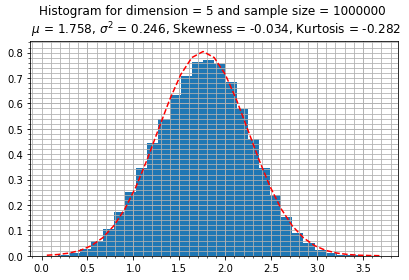

In [6]:
print_stats(result)
plot_distribution(euclidean_distances_vector_l, result, n)
try:
    plt.show()
except: pass

## Part 2
Calculate the Euclidean distance between the two points of each pair using vectorized operations and inner product.

In [16]:
# using vectorization by calculating inner product
start = timeit.default_timer()
### START CODE HERE ### (≈ 3 lines of code)

# compute Euclidean distances between each element in X and Y using (vectorized implementation)
# store results in euclidean_distances_vector_v 

euclidean_distances_vector_v = np.array([])
euclidean_distances_vector_v = np.sqrt(np.sum((X - Y)**2, axis=1))

### END CODE HERE ###
stop = timeit.default_timer()
print( 'Running time: ', stop-start )

Running time:  0.0540442620003887


In [17]:
# Filename: VectorizedDistance, PART: VrXL6
### GRADED PART (DO NOT EDIT) ### 
result = euclidean_distances_stats(euclidean_distances_vector_v)
result
### GRADED PART (DO NOT EDIT) ###

array([ 1.75829615,  0.24603651, -0.03380356, -0.28174894])

## Question 3 
We repeat question 1 and question 2 for $n=1$, $n=5$, $n=10$, $n=100$, $n=1000$, $n=5000$, and $n=10000$. Then plot the expectation and variance as a function of $n$.
You need to generate two sets of n-dimensional samples, compute 

In [19]:
def VectorizationMethod(dim_space, sample_size, lower_boundary, upper_boundary, bins_number=30):
    """
    Generate sample_size elements from dim_space-dimensional space. The coordinates of each element in the space
    are sampled from uniform distribution between lower_boundary and upper_boundary
    
    Arguments: 
    
    dim_space - dimension of the space, a positive integer
    sample_size - number of samples in the dim_space-dimensional space
    lower_boundary - lower boundary of coordinates sampled from U(lower_boundary, upper_boundary)
    upper_boundary - lower boundary of coordinates sampled from U(lower_boundary, upper_boundary)
    bins_number - number of bins to plot a histogram
    
    stats_result - np.array() of length 4
        the first element of array is the mean
        the second element is variance
        the third element is skew of the distribution
        the forth element is kurtusis of the distribution
    """
    ### START CODE HERE ### (≈ 7-10 lines of code)
    euclidean_distances_vector_v = np.array([])
    X = np.random.uniform( low=lower_boundary, high=upper_boundary, size=(sample_size, n) )
    Y = np.random.uniform( low=lower_boundary, high=upper_boundary, size=(sample_size, n) )
    euclidean_distances_vector_v = np.sqrt(np.sum((X - Y)**2, axis=1))
   
    stats_result = euclidean_distances_stats(euclidean_distances_vector_v)
    fig = plot_distribution(euclidean_distances_vector_v, stats_result, dim_space)
    ### END CODE HERE ###
    return tuple(stats_result.tolist())

Calculating finished for sample size = 10000, dimension = 2 

Calculating finished for sample size = 10000, dimension = 5 

Calculating finished for sample size = 10000, dimension = 10 

Calculating finished for sample size = 10000, dimension = 20 

Calculating finished for sample size = 10000, dimension = 40 

Calculating finished for sample size = 10000, dimension = 60 

Calculating finished for sample size = 10000, dimension = 80 

Calculating finished for sample size = 10000, dimension = 100 

Calculating finished for sample size = 10000, dimension = 200 

Calculating finished for sample size = 10000, dimension = 400 

Calculating finished for sample size = 10000, dimension = 600 

Calculating finished for sample size = 10000, dimension = 800 

Calculating finished for sample size = 10000, dimension = 1000 

Running time:  1.207379947998561


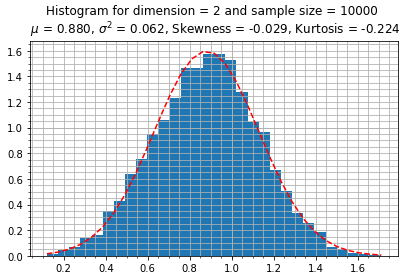

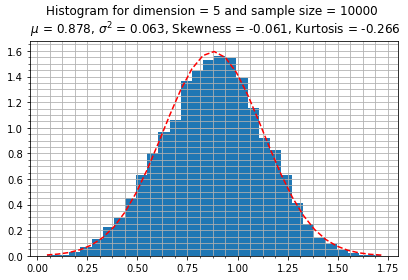

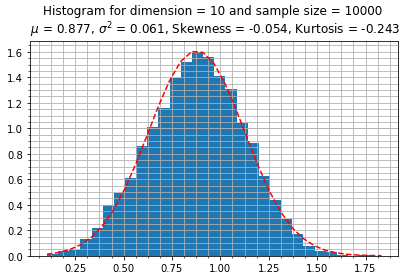

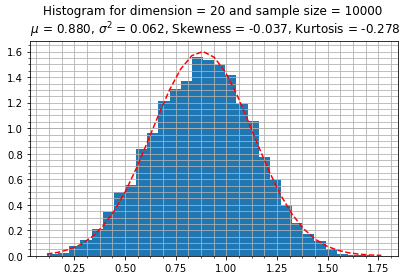

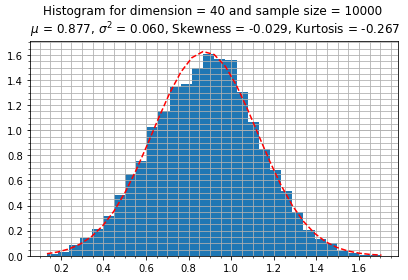

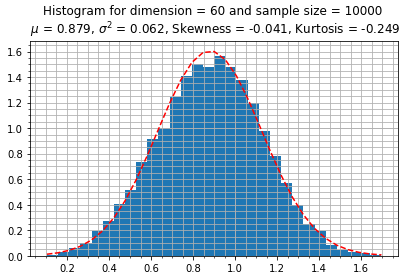

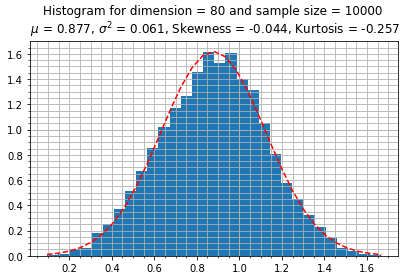

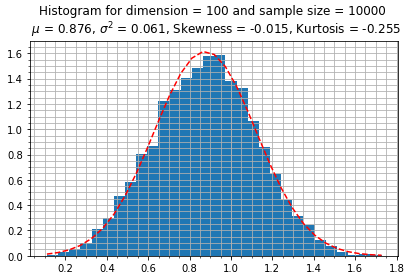

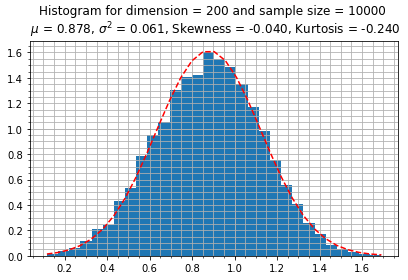

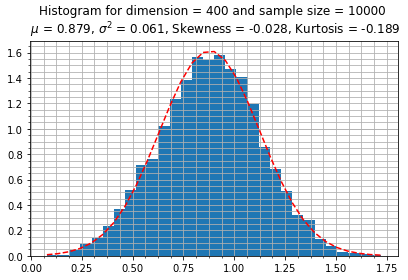

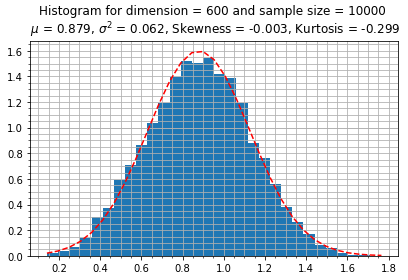

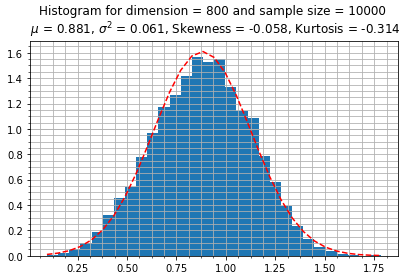

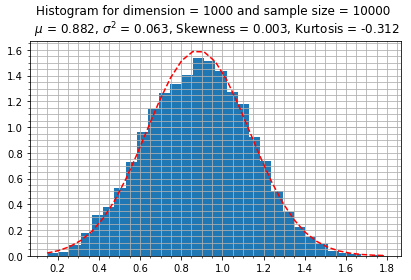

In [20]:
start = timeit.default_timer()

sample_size = 10000
lower_boundary = 0
upper_boundary = 1
dimension_vector = [2, 5, 10, 20, 40, 60, 80, 100, 200, 400, 600, 800, 1000] 
n_dims = len(dimension_vector)

euclidean_distances_mean_vector = [np.nan] * n_dims
euclidean_distances_variance_vector = [np.nan] * n_dims
euclidean_distances_skewness_vector = [np.nan] * n_dims
euclidean_distances_kurtosis_vector = [np.nan] * n_dims

for idx, space_dims in enumerate(dimension_vector):
    
    # using vectorization
    euclidean_distances_mean, euclidean_distances_variance, euclidean_distances_skewness, euclidean_distances_kurtosis = \
                 VectorizationMethod( space_dims, sample_size, lower_boundary, upper_boundary )
        
    euclidean_distances_mean_vector[idx] = euclidean_distances_mean
    euclidean_distances_variance_vector[idx] = euclidean_distances_variance
    euclidean_distances_skewness_vector[idx] = euclidean_distances_skewness
    euclidean_distances_kurtosis_vector[idx] = euclidean_distances_kurtosis
    
    print( 'Calculating finished for sample size = %d, dimension = %d' %( sample_size, space_dims), '\n' )

stop = timeit.default_timer()
print( 'Running time: ', stop-start )

In [21]:
# Filename : DistancesMean, PART: XsLp1
### GRADED PART (DO NOT EDIT) ###
euclidean_distances_mean_vector
### GRADED PART (DO NOT EDIT) ###

[0.8797504593587482,
 0.8775914309380358,
 0.8770191070167744,
 0.8798871950174405,
 0.8765423837363114,
 0.8793927499680023,
 0.8774674399015965,
 0.8756451829983224,
 0.8783192692123679,
 0.8788033119521442,
 0.8788585216046715,
 0.8805534232693739,
 0.8818864715918846]

In [22]:
# Filename: DistancesVariance, PART jD7SY
### GRADED PART (DO NOT EDIT) ###
euclidean_distances_variance_vector
### GRADED PART (DO NOT EDIT) ###

[0.06237927295357301,
 0.06252072863711595,
 0.061377788216870455,
 0.06205711906666127,
 0.06001106009071823,
 0.06170378091222207,
 0.06073149418471179,
 0.06103995148583206,
 0.06099528562835508,
 0.061011102879879923,
 0.0621827076600497,
 0.06137510848116967,
 0.06253065715784539]

In [23]:
# Filename:  DistancesSkewness, PART: Ad4J0
### GRADED PART (DO NOT EDIT) ###
euclidean_distances_skewness_vector
### GRADED PART (DO NOT EDIT) ###

[-0.028646716367298826,
 -0.06054724210618254,
 -0.053904033892013085,
 -0.03728087506083907,
 -0.02946343920226618,
 -0.04113271073675699,
 -0.044318186534489226,
 -0.014596721781313434,
 -0.03955662840618994,
 -0.028129778688024618,
 -0.0027303334588205386,
 -0.057937943119349446,
 0.002892133016036103]

In [24]:
# Filename: DistancesKurtosis, PART: 1nPFm
### GRADED PART (DO NOT EDIT) ###
euclidean_distances_kurtosis_vector
### GRADED PART (DO NOT EDIT) ###

[-0.22433699020557674,
 -0.2661238351789832,
 -0.24349432564487739,
 -0.2778154365108576,
 -0.2671855303275539,
 -0.24862882555938848,
 -0.2571234766063082,
 -0.25530827680875223,
 -0.2404993671811213,
 -0.18861455240553626,
 -0.2987701615847005,
 -0.31399535902158293,
 -0.31248854315348584]

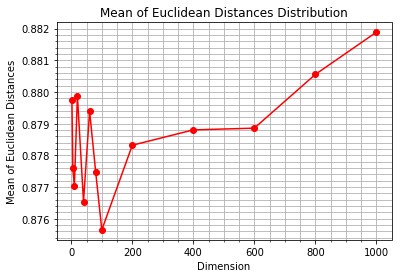

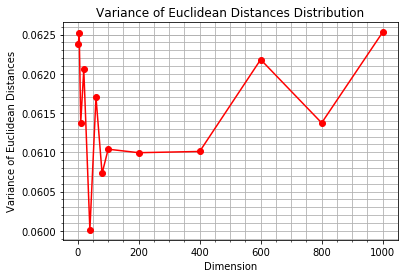

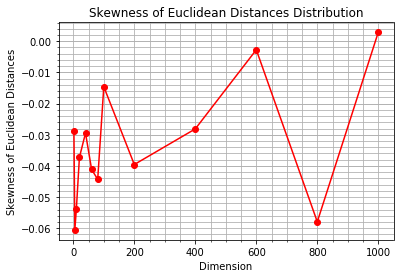

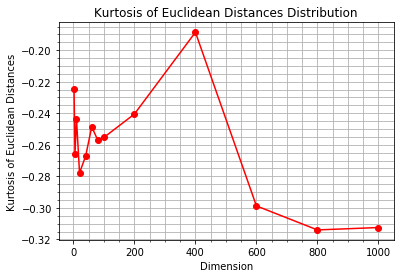

In [25]:
# here we plot the stats for different sample sizes
try:
    plt.figure()
    plt.plot( dimension_vector, euclidean_distances_mean_vector, 'r-', marker='o' )
    plt.grid( True, which='both')
    plt.minorticks_on()
    plt.title( 'Mean of Euclidean Distances Distribution' )
    plt.xlabel( 'Dimension' )
    plt.ylabel( 'Mean of Euclidean Distances' )

    plt.figure()
    plt.plot( dimension_vector, euclidean_distances_variance_vector, 'r-', marker='o' )
    plt.grid( True, which='both')
    plt.minorticks_on()
    plt.title( 'Variance of Euclidean Distances Distribution' )
    plt.xlabel( 'Dimension' )
    plt.ylabel( 'Variance of Euclidean Distances' )

    plt.figure()
    plt.plot( dimension_vector, euclidean_distances_skewness_vector, 'r-', marker='o' )
    plt.grid( True, which='both')
    plt.minorticks_on()
    plt.title( 'Skewness of Euclidean Distances Distribution' )
    plt.xlabel( 'Dimension' )
    plt.ylabel( 'Skewness of Euclidean Distances' )

    plt.figure()
    plt.plot( dimension_vector, euclidean_distances_kurtosis_vector, 'r-', marker='o' )
    plt.grid( True, which='both')
    plt.minorticks_on()
    plt.title( 'Kurtosis of Euclidean Distances Distribution' )
    plt.xlabel( 'Dimension' )
    plt.ylabel( 'Kurtosis of Euclidean Distances' )

    matplotlib.pyplot.show()
except: pass